**Imports**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

Load the data

In [16]:
traindemog_df = pd.read_csv("data/traindemographics.csv",
                            names=None,	# list of column names if none on csv
                          header=0) # ignore the first row of the CSV file.
trainperf_df = pd.read_csv("data/trainperf.csv",
                          header=0)
trainprev_df = pd.read_csv("data/trainprevloans.csv",
                          header=0)

# Data cleaning#

In [133]:
traindemog_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [6]:
trainperf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [8]:
trainprev_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [19]:
trainperf_df.nunique()

customerid       4368
systemloanid     4368
loannumber         23
approveddate     4362
creationdate     4364
loanamount         10
totaldue           47
termdays            4
referredby        521
good_bad_flag       2
dtype: int64

In [20]:
trainperf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
customerid       4368 non-null object
systemloanid     4368 non-null int64
loannumber       4368 non-null int64
approveddate     4368 non-null object
creationdate     4368 non-null object
loanamount       4368 non-null float64
totaldue         4368 non-null float64
termdays         4368 non-null int64
referredby       587 non-null object
good_bad_flag    4368 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 341.3+ KB


In [4]:
traindemog_df.nunique()

customerid                    4334
birthdate                     3297
bank_account_type                3
longitude_gps                 4103
latitude_gps                  4313
bank_name_clients               18
bank_branch_clients             45
employment_status_clients        6
level_of_education_clients       4
dtype: int64

In [5]:
traindemog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
customerid                    4346 non-null object
birthdate                     4346 non-null object
bank_account_type             4346 non-null object
longitude_gps                 4346 non-null float64
latitude_gps                  4346 non-null float64
bank_name_clients             4346 non-null object
bank_branch_clients           51 non-null object
employment_status_clients     3698 non-null object
level_of_education_clients    587 non-null object
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [6]:
trainprev_df.nunique()

customerid          4359
systemloanid       18183
loannumber            26
approveddate       18172
creationdate       18173
loanamount            16
totaldue              97
termdays               4
closeddate         17955
referredby           521
firstduedate         363
firstrepaiddate    18011
dtype: int64

In [7]:
trainprev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
customerid         18183 non-null object
systemloanid       18183 non-null int64
loannumber         18183 non-null int64
approveddate       18183 non-null object
creationdate       18183 non-null object
loanamount         18183 non-null float64
totaldue           18183 non-null float64
termdays           18183 non-null int64
closeddate         18183 non-null object
referredby         1026 non-null object
firstduedate       18183 non-null object
firstrepaiddate    18183 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [89]:
print('prev:')
print(trainprev_df.columns)
print('\ndemog:')
print(traindemog_df.columns)
print('\nperf:')
print(trainperf_df.columns)

prev:
Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

demog:
Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

perf:
Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')


Loans listed in 'perf' are unique? None of them match any in 'prev'?

**Cleaning up and merging**

Notes: Merging

1. customerid and loan id are all unique in the performance data(no repetitions)
2. customerid is not all unique in demographics data. a few repetitions. Edit: after checking the repetitions, the values are all similar
3. loanid is all unique in the previous loans data but customerid is not.

In [17]:
# remove the repeated rows for each costuomerid in demographics
traindemog_df.drop_duplicates(subset=['customerid'], inplace=True)

In [18]:
# edit the bank names to remove spaces
traindemog_df['bank_name_clients'] = traindemog_df['bank_name_clients'].apply(lambda x: '_'.join(x.split()))

Alternative: drop bank_name_clients column

In [19]:
traindemog_df.drop(columns=['bank_name_clients'], inplace=True)

In [20]:
# merge demographics with perfomance. Performance taking priority
merged_df = trainperf_df.merge(traindemog_df, on=['customerid'], how='left')

In [144]:
merged_df.info() # some customerids in demographcs data are not in performance data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 18 columns):
customerid                    4368 non-null object
systemloanid                  4368 non-null int64
loannumber                    4368 non-null int64
approveddate                  4368 non-null object
creationdate                  4368 non-null object
loanamount                    4368 non-null float64
totaldue                      4368 non-null float64
termdays                      4368 non-null int64
referredby                    587 non-null object
good_bad_flag                 4368 non-null object
birthdate                     3269 non-null object
bank_account_type             3269 non-null object
longitude_gps                 3269 non-null float64
latitude_gps                  3269 non-null float64
bank_name_clients             3269 non-null object
bank_branch_clients           33 non-null object
employment_status_clients     2776 non-null object
level_of_education_clients  

Notes: Previous loans

Create new columns from the previous loans 
1. Average loanamount for each customerid
2. Number of times referred
3. Average number of days since paid before firstduedate
4. Average number of days till paid after firstduedate
5. Average term days
6. Total number of defaulted loans. Edit: No defaulted prev loans (No NAN in firstrepaiddate)
7. 

In [21]:
# Convert timestamp strings into datetime objects
trainprev_df['firstduedatestamp'] = pd.to_datetime(trainprev_df['firstduedate'])
trainprev_df['firstrepaiddatestamp'] = pd.to_datetime(trainprev_df['firstrepaiddate'])
# Obtain the respective daysearly and dayslate values for each row. If negative set to 0
trainprev_df['daysearly'] = trainprev_df[['firstduedatestamp','firstrepaiddatestamp']].apply(
    lambda x: (x[0] - x[1]).days * (x[0] > x[1]), axis=1)
trainprev_df['dayslate'] = trainprev_df[['firstrepaiddatestamp','firstduedatestamp']].apply(
    lambda x: (x[0] - x[1]).days * (x[0] > x[1]), axis=1)
# Average duration before approval for prev loans
trainprev_df['approveddatestamp'] = pd.to_datetime(trainprev_df['approveddate'])
trainprev_df['creationdatestamp'] = pd.to_datetime(trainprev_df['creationdate'])
trainprev_df['b4approval'] = trainprev_df[['approveddatestamp','creationdatestamp']].apply(
    lambda x: (x[0] - x[1]).seconds/60, axis=1)
# Drop the timestamp str columns
trainprev_df.drop(
    columns=['creationdatestamp', 'approveddatestamp','firstduedate','firstrepaiddate'], inplace=True)

In [22]:
# New dataframe with the new columns
termdays = trainprev_df.groupby('customerid')['termdays'].mean()
daysearly = trainprev_df.groupby('customerid')['daysearly'].mean()
dayslate = trainprev_df.groupby('customerid')['dayslate'].mean()
loanamount = trainprev_df.groupby('customerid')['loanamount'].mean()
referredby = trainprev_df.groupby('customerid')['referredby'].unique()
av_wait_time = trainprev_df.groupby('customerid')['b4approval'].mean()
trainprev_df_ = termdays.to_frame()
trainprev_df_.rename(columns={"termdays": "prev_termdaysmean"}, inplace=True)
trainprev_df_['prev_daysearlymean'] = daysearly
trainprev_df_['prev_dayslatemean'] = dayslate
trainprev_df_['prev_loanamountmean'] = loanamount
trainprev_df_['referred'] = referredby
trainprev_df_['prev_wait_timemean'] = av_wait_time
trainprev_df_['prev_referredcount'] = trainprev_df_['referred'].apply(
    lambda x: sum(~pd.isna(x)))
trainprev_df_.drop(
    columns=['referred'], inplace=True)
trainprev_df_.reset_index(inplace=True)

In [23]:
# merge new columns to the merged df. Merged df taking priority
merged_df = merged_df.merge(trainprev_df_, on=['customerid'], how='left')

In [12]:
merged_df.info() #4359 customerids match in merged df out of 4368

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 21 columns):
customerid                    4368 non-null object
loannumber                    4368 non-null int64
approveddate                  4368 non-null object
creationdate                  4368 non-null object
loanamount                    4368 non-null float64
termdays                      4368 non-null int64
referredby                    587 non-null object
good_bad_flag                 4368 non-null object
bank_account_type             3269 non-null object
longitude_gps                 3269 non-null float64
latitude_gps                  3269 non-null float64
bank_branch_clients           33 non-null object
employment_status_clients     2776 non-null object
level_of_education_clients    443 non-null object
prev_termdaysmean             4359 non-null float64
prev_daysearlymean            4359 non-null float64
prev_dayslatemean             4359 non-null float64
prev_loanamountmean       

In [62]:
merged_df.tail()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,...,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,prev_termdaysmean,prev_daysearlymean,prev_dayslatemean,prev_loanamountmean,prev_wait_timemean,prev_referredcount
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad,...,NaN,NaN,NaN,NaN,30.0,0.000000,5.0,10000.000000,60.200000,0.0
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad,...,FCMB,NaN,Permanent,NaN,30.0,3.000000,0.0,10000.000000,61.133333,0.0
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad,...,First Bank,NaN,Permanent,NaN,15.0,0.000000,8.0,10000.000000,60.150000,0.0
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad,...,Skye Bank,NaN,Permanent,NaN,30.0,0.000000,0.0,10000.000000,61.150000,1.0
4367,8a858fd458639fcc015868eb14b542ad,301967124,8,2017-07-06 21:01:06.000000,2017-07-06 20:01:01.000000,30000.0,34500.0,30,NaN,Bad,...,GT Bank,NaN,NaN,NaN,30.0,2.428571,0.0,18571.428571,60.152381,0.0


In [8]:
# View class distribution
print(merged_df.groupby('good_bad_flag').size())

good_bad_flag
Bad      952
Good    3416
dtype: int64


Notes: Merged_df

1. Lots of empty datapoints (NaN). Deal with those
2. Time series data: birthdate, closeddate, approveddate. Extract new columns with these: Age
3. Unnecessary columns to remove: loanid, totaldue?,
4. Round down days fields to whole numbers
5. Convert labels to one-hot encoded columns?
6. Move target column to last column
7. Normalise data: standard scaler
8. Target class distribution is imbalanced. Deal with this. Edit: Drastic improvement in recall scores
9. **TODO: find average wait for approval for previous loans for each customer** Edit: Done

NaN
1. previously referred count adn all prev_.. features: fill NaN with '0's. Edit: Prev_waittimemean to be imputed Or is it better to drop the rows(9 of them) to prevent distortion? Edit: dropping reduced acc score by 2%. Edit: imputing with median dropped acc score by 0.8%, with mean dropped by 0.7%
2. bank_branch_clients has lots of NaNs. 33 rows not NaN. >99% of data. Drop
3. longitude_gps and latitude_gps with 1099 NaNs. ~25% of data. drop?
4. level_of_education_clients has a lot of NaNs. 443 rows not NaN. Possibly drop column
5. referredby has a lot of NaNs. 587 not NaN. Drop. New column with indicator values. Referred or not (1/0)
6. The 'NaN' datapoints in the 'bank_account_type' could be changed to belong to 'other' since the implication of 'other' may as well include unlabelled for the algorithm. Edit: Gives a .7% accuracy improvement.
7. bank_name_clients has 1099 NaNs. ~25% of data. drop/fillna?
8. employment_status_clients has 1592 NaNs. drop/fillna?
9. 

In [24]:
# Age
# Convert timestamp strings into datetime objects
merged_df['birthdatestamp'] = pd.to_datetime(merged_df['birthdate'])
merged_df['approveddatestamp'] = pd.to_datetime(merged_df['approveddate'])
# age in years as at approval date
merged_df['age_years'] = merged_df[['approveddatestamp','birthdatestamp']].apply(
    lambda x: (x[0].year - x[1].year), axis=1)
# Drop the timestamp str columns and other unnecessary columns
merged_df.drop(
    columns=['birthdate','birthdatestamp','approveddatestamp', 'systemloanid', 'totaldue'], inplace=True)

In [25]:
# NaN
merged_df['referred'] = merged_df['referredby'].apply(lambda x: (not pd.isna(x)) * 1)
merged_df.drop(columns=['bank_branch_clients','level_of_education_clients',
                        'employment_status_clients','referredby', 'bank_account_type'], inplace=True)
# Numeric cols
# countfil = merged_df.groupby('customerid')['prev_referredcount'].median()
# termfil = merged_df.groupby('customerid')['prev_termdaysmean'].median()
# earlyfil = merged_df.groupby('customerid')['prev_daysearlymean'].median()
# latefil = merged_df.groupby('customerid')['prev_dayslatemean'].median()
# loanfil = merged_df.groupby('customerid')['prev_loanamountmean'].median()
# waitfil = merged_df.groupby('customerid')['prev_wait_timemean'].median()
# merged_df['prev_referredcount'].fillna(value=countfil, inplace=True)
# merged_df['prev_termdaysmean'].fillna(value=termfil, inplace=True)
# merged_df['prev_daysearlymean'].fillna(value=earlyfil, inplace=True)
# merged_df['prev_dayslatemean'].fillna(value=latefil, inplace=True)
# merged_df['prev_loanamountmean'].fillna(value=loanfil, inplace=True)
# merged_df['prev_wait_timemean'].fillna(value=waitfil, inplace=True)
# merged_df.dropna(
#     subset=['prev_referredcount', 'prev_termdaysmean', 'prev_daysearlymean', 'prev_dayslatemean', 'prev_loanamountmean', 'prev_wait_timemean'], inplace=True)
# Categoricals cols
#merged_df['bank_account_type'].fillna(value='Other', inplace=True)
#merged_df['employment_status_clients'].fillna(value='Unknown', inplace=True)
#merged_df['bank_name_clients'].fillna(value='Unknown', inplace=True)

In [26]:
# column showing wait before approval since creation
merged_df['approveddatestamp'] = pd.to_datetime(merged_df['approveddate'])
merged_df['creationdatestamp'] = pd.to_datetime(merged_df['creationdate'])
# duration in minutes before the loan was approved after creation
merged_df['b4approval'] = merged_df[['approveddatestamp','creationdatestamp']].apply(
    lambda x: (x[0] - x[1]).seconds/60, axis=1)
merged_df.drop(columns=['approveddate', 'creationdate', 'approveddatestamp', 'creationdatestamp'], inplace=True)

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 18 columns):
customerid                   4368 non-null object
loannumber                   4368 non-null int64
loanamount                   4368 non-null float64
termdays                     4368 non-null int64
good_bad_flag                4368 non-null object
bank_account_type            4368 non-null object
longitude_gps                3269 non-null float64
latitude_gps                 3269 non-null float64
employment_status_clients    4368 non-null object
prev_termdaysmean            4359 non-null float64
prev_daysearlymean           4359 non-null float64
prev_dayslatemean            4359 non-null float64
prev_loanamountmean          4359 non-null float64
prev_wait_timemean           4359 non-null float64
prev_referredcount           4359 non-null float64
age_years                    3269 non-null float64
referred                     4368 non-null int64
b4approval                   4368 no

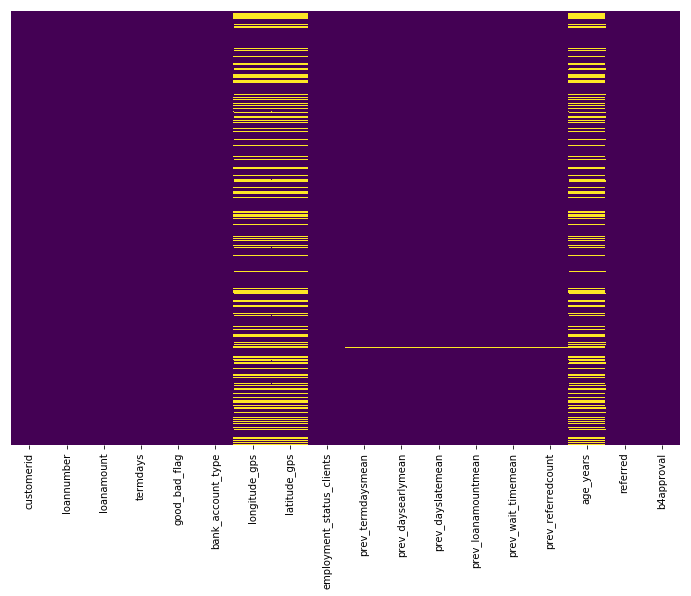

In [16]:
# show the remaining missing data
plt.figure(figsize=(12,8))
sns.heatmap(merged_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Remaining NaNs
1. Age column not populated for all rows. About 15% are NaN. Deal with using reasonable replacement with some form of imputation.
2. Longitude and latitude data also has ~15% of data as NaNs. Try clustering the datapoints. Test dif clusters for best K value using elbow curve
3. All prev_ cols miss 9 values. Impute.

For imputation on age column, we can use 
1. the median age for each class to estimate the unknown ages
2. Mean age for each class?
3. Mode age for each class?
4. Predictive imputation?
5. KNeighbours imputation? : Edit: Does not improve performance.

In [57]:
# Using the median might make more sense since there are outliers
merged_df.groupby('good_bad_flag')['age_years'].median()

good_bad_flag
Bad     31.0
Good    32.0
Name: age_years, dtype: float64

In [392]:
# Mean
merged_df.groupby('good_bad_flag')['age_years'].mean()

good_bad_flag
Bad     32.218794
Good    33.102504
Name: age_years, dtype: float64

In [59]:
# Mode
print(merged_df.groupby('good_bad_flag')['age_years'].value_counts().Bad.head(1))
print(merged_df.groupby('good_bad_flag')['age_years'].value_counts().Good.head(1))

age_years
33.0    52
Name: age_years, dtype: int64
age_years
31.0    198
Name: age_years, dtype: int64


In [27]:
def impute_age(cols):
    Age = cols[0]
    loanflag = cols[1]
    if pd.isnull(Age):
        if loanflag == 'Good':
            return 32
        elif loanflag == 'Bad':
            return 31
    else:
        return Age

In [328]:
print(merged_df.groupby('good_bad_flag')['prev_termdaysmean'].mean())
print('\n')
print(merged_df.groupby('good_bad_flag')['prev_daysearlymean'].mean())
print('\n')
print(merged_df.groupby('good_bad_flag')['prev_dayslatemean'].mean())
print('\n')
print(merged_df.groupby('good_bad_flag')['prev_wait_timemean'].mean())
print('\n')
print(merged_df.groupby('good_bad_flag')['prev_loanamountmean'].mean())
print('\n')
print(merged_df.groupby('good_bad_flag')['prev_referredcount'].mean())

good_bad_flag
Bad     25.132629
Good    25.396944
Name: prev_termdaysmean, dtype: float64


good_bad_flag
Bad     2.594056
Good    3.785345
Name: prev_daysearlymean, dtype: float64


good_bad_flag
Bad     3.975796
Good    1.073433
Name: prev_dayslatemean, dtype: float64


good_bad_flag
Bad     62.269126
Good    62.578280
Name: prev_wait_timemean, dtype: float64


good_bad_flag
Bad     11948.878905
Good    13169.555778
Name: prev_loanamountmean, dtype: float64


good_bad_flag
Bad     0.140756
Good    0.132611
Name: prev_referredcount, dtype: float64


In [28]:
def impute_termdays(cols):
    series = cols[0]
    loanflag = cols[1]
    if pd.isnull(series):
        if loanflag == 'Bad': 
            return 25.132629
        elif loanflag == 'Good':
            return 25.396944
    else:
        return series
    
def impute_earlydays(cols):
    series = cols[0]
    loanflag = cols[1]
    if pd.isnull(series):
        if loanflag == 'Bad':
            return 2.594056
        elif loanflag == 'Good':
            return 3.785345
    else:
        return series
    
def impute_latedays(cols):
    series = cols[0]
    loanflag = cols[1]
    if pd.isnull(series):
        if loanflag == 'Bad':
            return 3.975796
        elif loanflag == 'Good':
            return 1.073433
    else:
        return series
    
def impute_waittime(cols):
    series = cols[0]
    loanflag = cols[1]
    if pd.isnull(series):
        if loanflag == 'Bad':
            return 62.269126
        elif loanflag == 'Good':
            return 62.578280
    else:
        return series
    
def impute_loanamt(cols):
    series = cols[0]
    loanflag = cols[1]
    if pd.isnull(series):
        if loanflag == 'Bad':
            return 11948.878905
        elif loanflag == 'Good':
            return 13169.555778
    else:
        return series

def impute_referred(cols):
    series = cols[0]
    loanflag = cols[1]
    if pd.isnull(series):
        if loanflag == 'Bad':
            return 0.140756
        elif loanflag == 'Good':
            return 0.132611
    else:
        return series

In [29]:
# using the medians that are equivalent regardles of target class
# merged_df['prev_loanamountmean'].fillna(value=10000, inplace=True)
# merged_df['prev_referredcount'].fillna(value=0, inplace=True)

In [30]:
#new df for imputing
merged_df_ = merged_df.copy()
merged_df_['age_years'] = merged_df_[['age_years','good_bad_flag']].apply(impute_age, axis=1)
merged_df_['prev_termdaysmean'] = merged_df_[['prev_termdaysmean','good_bad_flag']].apply(impute_termdays, axis=1)
merged_df_['prev_daysearlymean'] = merged_df_[['prev_daysearlymean','good_bad_flag']].apply(impute_earlydays, axis=1)
merged_df_['prev_dayslatemean'] = merged_df_[['prev_dayslatemean','good_bad_flag']].apply(impute_latedays, axis=1)
merged_df_['prev_wait_timemean'] = merged_df_[['prev_wait_timemean','good_bad_flag']].apply(impute_waittime, axis=1)
merged_df_['prev_loanamountmean'] = merged_df_[['prev_loanamountmean','good_bad_flag']].apply(impute_loanamt, axis=1)
merged_df_['prev_referredcount'] = merged_df_[['prev_referredcount','good_bad_flag']].apply(impute_referred, axis=1)

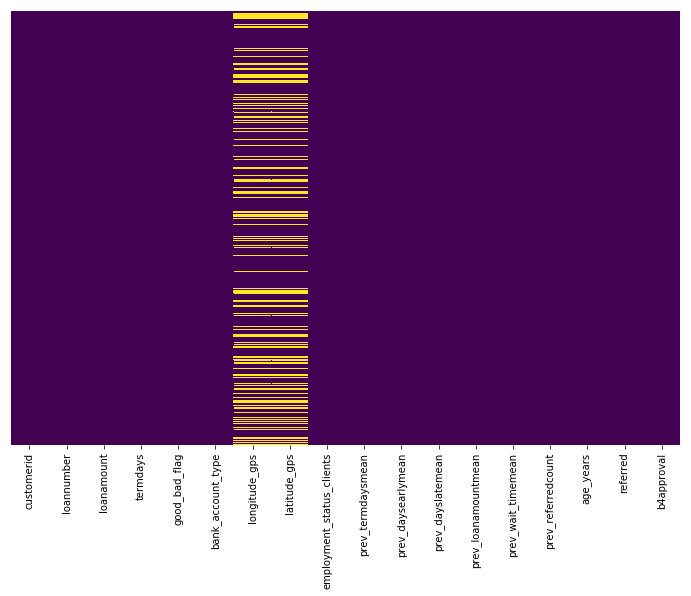

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(merged_df_.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can drop geo data

In [31]:
# drop geoposition
merged_df_ = merged_df_.drop(columns=['longitude_gps', 'latitude_gps'])

Or find a way to impute the missing data on the geo columns

In [16]:
from sklearn.cluster import KMeans

In [17]:
def plot_SSEvsK_curve(k_values, data):
    plt.figure()
    plt.style.use('ggplot')
    plt.xlabel("No. of Clusters (K)")
    plt.ylabel("SSE")
    sse = []
    for K in k_values:
        kmeans = KMeans(n_clusters=K)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(k_values, sse, 'g*-',label='SSE for each K')
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/matplotlib/pyplot.py'>

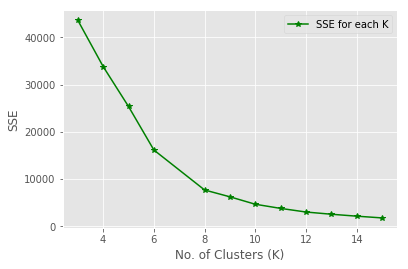

In [18]:
k_values = [3,4,5,6,8,9,10,11,12,13,14,15]
plot_SSEvsK_curve(k_values, merged_df_[['longitude_gps', 'latitude_gps']].dropna()) # 8 clusters is good enough

In [19]:
# create new column on df (for non nan data) with cluster labels
kmeans = KMeans(n_clusters=8)
kmeans.fit(merged_df_[['longitude_gps', 'latitude_gps']].dropna())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
kmeans.cluster_centers_

array([[  3.5975726 ,   6.84544927],
       [-92.79675907,  34.69770604],
       [102.91760309,  45.08363925],
       [ -4.39628567,  54.49305197],
       [151.20929   , -33.8688183 ],
       [  7.68676673,   9.46043187],
       [ 55.63899323,  25.2693538 ],
       [  6.79460078,   5.52027664]])

In [151]:
merged_df_clst = merged_df_.dropna(subset=['longitude_gps', 'latitude_gps'])['customerid'].to_frame()
merged_df_clst['cluster'] = kmeans.labels_

In [152]:
merged_df_clst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 0 to 4367
Data columns (total 2 columns):
customerid    3269 non-null object
cluster       3269 non-null int32
dtypes: int32(1), object(1)
memory usage: 63.8+ KB


In [153]:
merged_df_ = merged_df_.merge(merged_df_clst, on=['customerid'], how='left')
categorical_feats = ['cluster']
merged_df_final = pd.get_dummies(merged_df_, columns=categorical_feats, drop_first=True)

In [ ]:
# drop geoposition (after converting to categorical)
merged_df_final = merged_df_final.drop(columns=['longitude_gps', 'latitude_gps'])

In [156]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 24 columns):
customerid                   4368 non-null object
loannumber                   4368 non-null int64
loanamount                   4368 non-null float64
termdays                     4368 non-null int64
good_bad_flag                4368 non-null object
bank_account_type            4368 non-null object
bank_name_clients            4368 non-null object
employment_status_clients    4368 non-null object
prev_termdaysmean            4368 non-null float64
prev_daysearlymean           4368 non-null float64
prev_dayslatemean            4368 non-null float64
prev_loanamountmean          4368 non-null float64
prev_wait_timemean           4368 non-null float64
prev_referredcount           4368 non-null float64
age_years                    4368 non-null float64
referred                     4368 non-null int64
b4approval                   4368 non-null float64
cluster_1.0                  4368 non

1. Try adding an additional class- unknown for the null locations. Edit: accuracy drops by ~1.9
2. Imputing the mean cluster to the null values. Edit: Performance drops by ~1.6
3. Imputing the median cluster to the null values. Edit: accuracy drops by ~1.2
4. Using KNeighbours to find the clusters

In [147]:
merged_df_['cluster'].mean()


1.5062710308962985

Mean estimated to be 2 from rounding of 
```python
merged_df_['cluster'].mean()
``` 
= 1.5062710308962985

In [148]:
# Median using frequency table (categorical data)
merged_df_.groupby('cluster')['customerid'].count()

cluster
0.0    2252
1.0      13
2.0       4
3.0     520
4.0       4
5.0       1
6.0       3
7.0     472
Name: customerid, dtype: int64

Median at the $(n + 1)/2$ $=1635$ position. This is cluster 0

In [149]:
merged_df_['cluster'].fillna(value=0., inplace=True)

In [89]:
merged_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 18 columns):
customerid                   4368 non-null object
loannumber                   4368 non-null int64
loanamount                   4368 non-null float64
termdays                     4368 non-null int64
good_bad_flag                4368 non-null object
bank_account_type            4368 non-null object
bank_name_clients            4368 non-null object
employment_status_clients    4368 non-null object
prev_termdaysmean            4368 non-null float64
prev_daysearlymean           4368 non-null float64
prev_dayslatemean            4368 non-null float64
prev_loanamountmean          4368 non-null float64
prev_wait_timemean           4368 non-null float64
prev_referredcount           4368 non-null float64
age_years                    4368 non-null float64
referred                     4368 non-null int64
b4approval                   4368 non-null float64
cluster                      4368 non

In [ ]:
# Predicive imputation
# for every feature that is missing, train the predictive model from the smaples that do not miss the value
# Use the predictive model to fill in the missing value
#
#

In [25]:
from sklearn.preprocessing import StandardScaler

In [144]:
# Kneighbours imputation
# fit the data using Kneighbours regressor
# find the kneighbours for each sample where there is missing data
# assign the mean/mode of the kneigbours as the missing datapoint
merged_df_knn = merged_df.set_index('customerid')
y_knn = merged_df_knn['age_years'] 
merged_df_knn = pd.concat(
    [merged_df_knn.drop(columns=['age_years','longitude_gps','latitude_gps']), y_knn], axis=1)
# one-hot encoding
#transform the categorical cols, later we'll do scaling which requires numerical
cols = ['good_bad_flag', 'bank_account_type', 'bank_name_clients', 'employment_status_clients']
merged_df_knn_hot = pd.get_dummies(merged_df_knn, columns=cols, drop_first=True)
# get customerids of the rows with the NaN age values
custNaN = list(merged_df_knn_hot[np.isnan(merged_df_knn_hot['age_years'])].reset_index()['customerid'])
samples = merged_df_knn_hot.drop(index=custNaN) #drop rows with NaN age values
samples_no_age = samples.drop(columns='age_years')  # remove the column to find neighbours for
knn_mis = merged_df_knn_hot[np.isnan(merged_df_knn_hot['age_years'])] #missing sample rows in a dataframe
knn_mis_no_age = knn_mis.drop(columns='age_years')  # remove the column to find neighbours for
# Normalising data
scaler = StandardScaler()
scaler.fit(samples_no_age)
samples_ = scaler.transform(samples_no_age)
df_scaled_samples = pd.DataFrame(samples_, columns=samples_no_age.columns)
df_scaled_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 37 columns):
loannumber                                 3269 non-null float64
loanamount                                 3269 non-null float64
termdays                                   3269 non-null float64
prev_termdaysmean                          3269 non-null float64
prev_daysearlymean                         3269 non-null float64
prev_dayslatemean                          3269 non-null float64
prev_loanamountmean                        3269 non-null float64
prev_referredcount                         3269 non-null float64
referred                                   3269 non-null float64
b4approval                                 3269 non-null float64
good_bad_flag_Good                         3269 non-null float64
bank_account_type_Other                    3269 non-null float64
bank_account_type_Savings                  3269 non-null float64
bank_name_clients_Diamond Bank             3269 

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [33]:
from sklearn.neighbors import NearestNeighbors

In [145]:
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(df_scaled_samples)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [146]:
# Acquire the neighbours and find median?
neighbours = neigh.kneighbors(knn_mis_no_age, return_distance=False)
def knn_age(samples, test, neighbours):
    for ix in range(len(neighbours)):
        ages = []
        for item in neighbours[ix]:
            ages.append(samples['age_years'][item])
        test['age_years'][ix] = np.mean(ages)
    return test

In [147]:
# Concatenante the filled df to the other section
new_ages = knn_age(samples.reset_index(), knn_mis.reset_index(), neighbours)
merged_df_knn_age = pd.concat([samples, new_ages.set_index(keys='customerid')])
merged_df_knn_age.tail(3)

,loannumber,loanamount,termdays,prev_termdaysmean,prev_daysearlymean,prev_dayslatemean,prev_loanamountmean,prev_referredcount,referred,b4approval,...,bank_name_clients_Unity Bank,bank_name_clients_Unknown,bank_name_clients_Wema Bank,bank_name_clients_Zenith Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,employment_status_clients_Unknown
customerid,,,,,,,,,,,,,,,,,,,,,
8a858fe55656a93801565764e5ec1430,10,40000.0,30,23,0,8,21111.111111,0.0,0,60.116667,...,0,1,0,0,0,0,0,0,0,1
8a858fee58f7c77e01590774b0054bba,10,30000.0,30,21,3,0,20000.000000,0.0,0,61.083333,...,0,1,0,0,0,0,0,0,0,1
8a858e6d58b0cc520158beeb14b22a5a,2,10000.0,30,30,0,5,10000.000000,0.0,0,61.200000,...,0,1,0,0,0,0,0,0,0,1


/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

/home/peterm/.local/share/virtualenvs/sk-eLjZDZHf/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



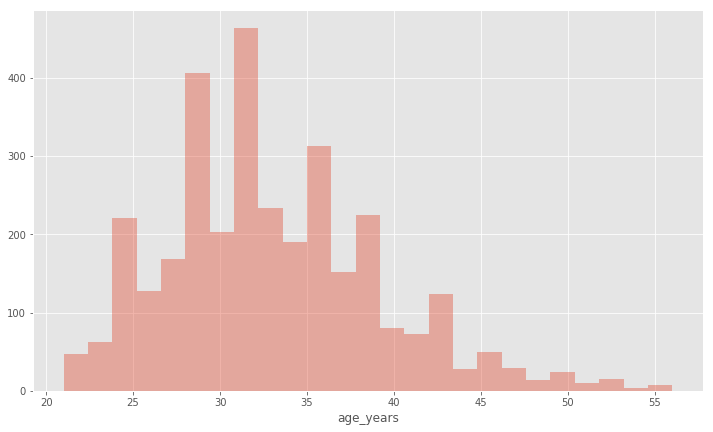

In [126]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.distplot(merged_df['age_years'], kde=False, bins=25)

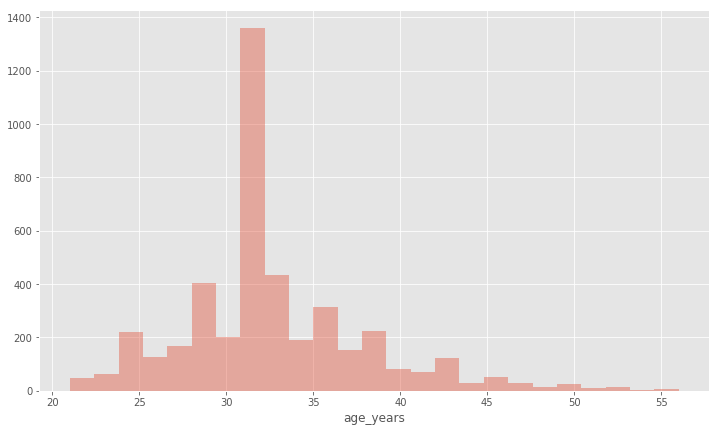

In [148]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.distplot(merged_df_knn_age['age_years'], kde=False, bins=25)

In [135]:
merged_df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 8a2a81a74ce8c05d014cfb32a0da1049 to 8a858fd458639fcc015868eb14b542ad
Data columns (total 46 columns):
loannumber                                 4368 non-null int64
loanamount                                 4368 non-null float64
termdays                                   4368 non-null int64
good_bad_flag                              4368 non-null object
prev_termdaysmean                          4368 non-null float64
prev_daysearlymean                         4368 non-null float64
prev_dayslatemean                          4368 non-null float64
prev_loanamountmean                        4368 non-null float64
prev_wait_timemean                         4368 non-null float64
prev_referredcount                         4368 non-null float64
age_years                                  4368 non-null float64
referred                                   4368 non-null int64
b4approval                                 4368 non-null float64
b

Same with age, estimate missing values for the geolocation

In [131]:
ynumeric = merged_df['good_bad_flag'].apply(lambda x: 1*(x=='Good'))

In [134]:
# Scatterplot of the entries using the geospatial datapoints
trace = dict(type = 'scattergeo',
            lon=merged_df['longitude_gps'], lat=merged_df['latitude_gps'],
            mode = 'markers',
             text = merged_df['employment_status_clients'],
             showlegend=False,
            marker = dict( 
                autocolorscale=False,
                size = 5, 
                symbol = 'square-dot',
                color = ynumeric,
                colorscale = [[0, 'red'], [1, 'blue']],
                colorbar=dict(
                    title='Good`(1)` or Bad`(0)` loan')
            )
        )
layout = dict(geo = dict(
                    scope = 'afric',
                    showland = True,
                    )
             )
fig = dict( data=[trace], layout=layout )
iplot( fig, validate=False )
#iplot([trace])

In [165]:
merged_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 20 columns):
customerid                   4368 non-null object
loannumber                   4368 non-null int64
loanamount                   4368 non-null float64
termdays                     4368 non-null int64
good_bad_flag                4368 non-null object
bank_account_type            4368 non-null object
longitude_gps                3269 non-null float64
latitude_gps                 3269 non-null float64
bank_name_clients            4368 non-null object
employment_status_clients    4368 non-null object
prev_termdaysmean            4368 non-null float64
prev_daysearlymean           4368 non-null float64
prev_dayslatemean            4368 non-null float64
prev_loanamountmean          4368 non-null float64
prev_wait_timemean           4368 non-null float64
prev_referredcount           4368 non-null float64
age_years                    4368 non-null float64
referred                     4368 n

In [182]:
clusters = merged_df_.dropna(subset=['cluster'])['cluster'].unique()
clusters

array([0., 3., 7., 4., 1., 6., 5., 2.])

In [195]:
# Scatterplot of the entries using the geospatial datapoints
trace = dict(type = 'scattergeo',
            lon=merged_df_['longitude_gps'], lat=merged_df_['latitude_gps'],
            mode = 'markers',
             text = merged_df_['loanamount'],
             showlegend=False,
            marker = dict( 
                autocolorscale=False,
                size = 5, 
                symbol = 'square-dot',
                color = merged_df_['cluster'],
#                 colorscale = [[0.0, 'red'], [1.0, 'blue'],
#                               [2.0, 'green'], [3.0, 'black'],
#                               [4.0, 'indigo'], [5.0, 'pink'],
#                               [6.0, 'azure'], [7.0, 'plum']],
                colorscale='Jet',
                colorbar=dict(
                    title='Clusters')
            )
        )
layout = dict(geo = dict(
                    scope = 'africa',
                    showland = True,
                    )
             )
fig = dict( data=[trace], layout=layout )
iplot( fig, validate=False )

The clusters we obtained seem logical. In Nigeria we have 3, centered around Lagos & Ibadan, Abuja and vicinity, Port Harcourt and vicinity. WE can possibly group these 3 into more.

**Blind ML**

In [32]:
merged_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 14 columns):
customerid             4368 non-null object
loannumber             4368 non-null int64
loanamount             4368 non-null float64
termdays               4368 non-null int64
good_bad_flag          4368 non-null object
prev_termdaysmean      4368 non-null float64
prev_daysearlymean     4368 non-null float64
prev_dayslatemean      4368 non-null float64
prev_loanamountmean    4368 non-null float64
prev_wait_timemean     4368 non-null float64
prev_referredcount     4368 non-null float64
age_years              4368 non-null float64
referred               4368 non-null int64
b4approval             4368 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 511.9+ KB


In [23]:
# one-hot encoding
#categorical_feats = ['bank_account_type', 'employment_status_clients'] #'bank_name_clients',
#categorical_feats = ['bank_account_type', 'bank_name_clients', 'employment_status_clients', 'cluster']
#merged_df_ = pd.get_dummies(merged_df_, columns=categorical_feats, drop_first=True)

In [22]:
merged_df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 40 columns):
customerid                                 4368 non-null object
loannumber                                 4368 non-null int64
loanamount                                 4368 non-null float64
termdays                                   4368 non-null int64
good_bad_flag                              4368 non-null object
prev_termdaysmean                          4368 non-null float64
prev_daysearlymean                         4368 non-null float64
prev_dayslatemean                          4368 non-null float64
prev_loanamountmean                        4368 non-null float64
prev_wait_timemean                         4368 non-null float64
prev_referredcount                         4368 non-null float64
age_years                                  4368 non-null float64
referred                                   4368 non-null int64
b4approval                                 4368 non-null

In [33]:
# set customer id as index and move target class column to last column
merged_df_.set_index('customerid', inplace=True)
#merged_df_ = merged_df_knn_age
y = merged_df_['good_bad_flag'] # Target class column
merged_df_new = pd.concat([merged_df_.drop(columns=['good_bad_flag']), y], axis=1)

In [34]:
merged_df_new.head()

,loannumber,loanamount,termdays,prev_termdaysmean,prev_daysearlymean,prev_dayslatemean,prev_loanamountmean,prev_wait_timemean,prev_referredcount,age_years,referred,b4approval,good_bad_flag
customerid,,,,,,,,,,,,,
8a2a81a74ce8c05d014cfb32a0da1049,12,30000.0,30,30.000000,7.181818,6.818182,18181.818182,98.396970,0.000000,45.0,0,60.150000,Good
8a85886e54beabf90154c0a29ae757c0,2,15000.0,30,25.396944,3.785345,1.073433,13169.555778,62.578280,0.132611,32.0,0,60.383333,Good
8a8588f35438fe12015444567666018e,7,20000.0,15,17.500000,3.666667,5.000000,10000.000000,60.169444,0.000000,33.0,0,60.100000,Good
8a85890754145ace015429211b513e16,3,10000.0,15,22.500000,0.000000,7.500000,10000.000000,60.116667,0.000000,40.0,0,60.100000,Good
8a858970548359cc0154883481981866,9,40000.0,30,37.500000,2.125000,0.000000,18750.000000,60.170833,0.000000,31.0,0,60.100000,Good


In [35]:
merged_df_new[merged_df_new['good_bad_flag']=='Bad'].describe()

,loannumber,loanamount,termdays,prev_termdaysmean,prev_daysearlymean,prev_dayslatemean,prev_loanamountmean,prev_wait_timemean,prev_referredcount,age_years,referred,b4approval
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,4.546218,15462.184874,29.149160,25.132629,2.594056,3.975796,11955.020330,62.269126,0.141200,31.912815,0.140756,62.350315
std,3.299295,9509.342280,11.520147,6.996781,4.112947,8.261422,4128.595183,15.274233,0.347863,5.390314,0.347953,39.882168
min,2.000000,10000.000000,15.000000,15.000000,0.000000,0.000000,9500.000000,60.066667,0.000000,21.000000,0.000000,60.066667
25%,2.000000,10000.000000,30.000000,18.000000,0.000000,0.000000,10000.000000,60.155208,0.000000,29.000000,0.000000,60.100000
50%,3.000000,10000.000000,30.000000,30.000000,1.000000,0.916084,10000.000000,60.220486,0.000000,31.000000,0.000000,60.116667
75%,6.000000,20000.000000,30.000000,30.000000,3.636364,4.931818,11961.659179,61.116667,0.000000,34.000000,0.000000,60.183333
max,22.000000,60000.000000,90.000000,60.000000,29.000000,123.000000,36666.666667,363.366667,1.000000,53.000000,1.000000,1132.533333


In [36]:
X = merged_df_new.drop(columns=['good_bad_flag'])
features = list(X.columns)
features

['loannumber',
 'loanamount',
 'termdays',
 'prev_termdaysmean',
 'prev_daysearlymean',
 'prev_dayslatemean',
 'prev_loanamountmean',
 'prev_wait_timemean',
 'prev_referredcount',
 'age_years',
 'referred',
 'b4approval']

In [37]:
from imblearn.combine import SMOTEENN

In [38]:
# oversampling and undersampling
smote_enn = SMOTEENN(random_state=0, ratio = 0.9)   # Oversample the minority class, undersample the minority
X_res, y_res = smote_enn.fit_resample(X, y)

In [39]:
y_res

array(['Bad', 'Bad', 'Bad', ..., 'Good', 'Good', 'Good'], dtype=object)

In [40]:
(y_res=='Good').astype(np.int32)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [41]:
from collections import Counter
# View class distribution for resampled data
print('Resampled', '\n', sorted(Counter(y_res).items()))

Resampled 
 [('Bad', 1841), ('Good', 1674)]


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category=DataConversionWarning)

In [43]:
scaler = StandardScaler()
scaler.fit(X_res)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
import joblib
joblib.dump(scaler, 'datasets/zindi-loanpred/scaler-1806-1.pckl')

['datasets/zindi-loanpred/scaler-1806-1.pckl']

In [45]:
scaled_features = scaler.transform(X_res)
df_feat = pd.DataFrame(scaled_features, columns=merged_df_new.columns[:-1])

In [34]:
df_feat.head()

,loannumber,loanamount,termdays,prev_termdaysmean,prev_daysearlymean,prev_dayslatemean,prev_loanamountmean,prev_wait_timemean,prev_referredcount,age_years,...,bank_name_clients_Unity_Bank,bank_name_clients_Unknown,bank_name_clients_Wema_Bank,bank_name_clients_Zenith_Bank,employment_status_clients_Permanent,employment_status_clients_Retired,employment_status_clients_Self-Employed,employment_status_clients_Student,employment_status_clients_Unemployed,employment_status_clients_Unknown
0,-0.456402,-0.589504,0.158956,-0.395641,-0.000500,0.116480,-0.491483,-0.153524,-0.423002,-0.638628,...,-0.024394,-0.692331,-0.064062,-0.245696,1.120683,-0.023042,-0.23586,-0.174579,-0.071663,-0.952828
1,0.451861,-0.589504,0.158956,0.739827,-0.580122,2.372563,-0.491483,-0.152128,-0.423002,-0.240025,...,-0.024394,1.542374,-0.064062,-0.245696,-0.992290,-0.023042,-0.23586,-0.174579,-0.071663,1.164877
2,-0.153647,-0.589504,0.158956,-0.774130,-0.161506,0.386817,-0.491483,-0.156272,-0.423002,0.158577,...,-0.024394,-0.692331,-0.064062,-0.245696,-0.992290,-0.023042,-0.23586,-0.174579,-0.071663,1.164877
3,-0.153647,0.433678,-1.332664,-0.774130,0.482519,-0.399617,-0.491483,-0.156695,-0.423002,-1.635134,...,-0.024394,-0.692331,-0.064062,4.616816,-0.992290,-0.023042,-0.23586,6.375362,-0.071663,-0.952828
4,0.754615,1.456861,3.142195,1.496806,-0.523770,-0.399617,0.696518,-0.153101,-0.423002,-0.240025,...,-0.024394,1.542374,-0.064062,-0.245696,-0.992290,-0.023042,-0.23586,-0.174579,-0.071663,1.164877


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [47]:
X_train, X_test, y_train, y_test = train_test_split(*shuffle(scaled_features, (y_res=='Good').astype(np.int32)),
                                                    test_size=0.30, random_state=42)

In [48]:
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
# clf_base = RandomForestClassifier(n_estimators=10)
GBC = GradientBoostingClassifier(n_estimators=500, random_state=42)
clfModel = GBC.fit(X_train,y_train)
clfModel

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
predictions = GBC.predict(X_test)
trainingtest = GBC.predict(X_train)

In [52]:
pred_proba = GBC.predict_proba(X_test)

In [53]:
class_labels = ["Bad", "Good"]
res = enumerate((pred_proba[:, 1] > 0.5).astype(int))
["{} loan at {:0.1f}% confidence. Correct class: {} loan".format(
    class_labels[ix], 100*pred_proba[i,ix], class_labels[y_test[i]]) for (i,ix) in res][-10:]

['Good loan at 98.5% confidence. Correct class: Good loan',
 'Bad loan at 74.5% confidence. Correct class: Bad loan',
 'Good loan at 99.5% confidence. Correct class: Good loan',
 'Bad loan at 99.8% confidence. Correct class: Bad loan',
 'Good loan at 100.0% confidence. Correct class: Good loan',
 'Good loan at 99.9% confidence. Correct class: Good loan',
 'Good loan at 99.0% confidence. Correct class: Good loan',
 'Bad loan at 99.6% confidence. Correct class: Bad loan',
 'Bad loan at 97.3% confidence. Correct class: Bad loan',
 'Bad loan at 99.5% confidence. Correct class: Bad loan']

In [54]:
from sklearn import metrics
precision, recall, threshold = metrics.precision_recall_curve(y_test, predictions)
print("precision-recall AUC: {}".format(metrics.auc(recall, precision)))
print("receiver-operator AUC: {}".format(metrics.roc_auc_score(y_test, predictions)))

precision-recall AUC: 0.9332457720198174
receiver-operator AUC: 0.9265016092553933


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(classification_report(y_test, predictions))
print('tn: '+str(tn)+', fp: '+str(fp)+', fn: '+str(fn)+', tp: '+str(tp))
print('Training Accuracy score:', accuracy_score(y_train, trainingtest))
print('Test Accuracy score:', accuracy_score(y_test, predictions))
print('Test F1 score:', f1_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       576
           1       0.90      0.94      0.92       479

   micro avg       0.93      0.93      0.93      1055
   macro avg       0.92      0.93      0.92      1055
weighted avg       0.93      0.93      0.93      1055

tn: 525, fp: 51, fn: 28, tp: 451
Training Accuracy score: 0.9865853658536585
Test Accuracy score: 0.9251184834123223
Test F1 score: 0.9194699286442406


In [59]:
joblib.dump(clfModel, 'datasets/zindi-loanpred/clfModel-1806-1.pckl')

['datasets/zindi-loanpred/clfModel-1806-1.pckl']

Notes:

Before solving imbalance
```python
#LR:
# Confusion matrix
[[ 34 258]
 [ 24 995]]
tn, fp, fn, tp: 34 , 258 , 24 , 995
# Classification Report
              precision    recall  f1-score   support
         Bad       0.59      0.12      0.19       292
        Good       0.79      0.98      0.88      1019

   micro avg       0.78      0.78      0.78      1311
   macro avg       0.69      0.55      0.54      1311
weighted avg       0.75      0.78      0.72      1311

#CART
# Confusion matrix
[[108 184]
 [206 813]]
tn, fp, fn, tp: 108 , 184 , 206 , 813
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.34      0.37      0.36       292
        Good       0.82      0.80      0.81      1019

   micro avg       0.70      0.70      0.70      1311
   macro avg       0.58      0.58      0.58      1311
weighted avg       0.71      0.70      0.71      1311

#RFC
# Confusion matrix
[[ 64 228]
 [ 64 955]]
tn, fp, fn, tp: 64 , 228 , 64 , 955
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.50      0.22      0.30       292
        Good       0.81      0.94      0.87      1019

   micro avg       0.78      0.78      0.78      1311
   macro avg       0.65      0.58      0.59      1311
weighted avg       0.74      0.78      0.74      1311

#LSCV
# Confusion matrix
[[ 32 260]
 [ 23 996]]
tn, fp, fn, tp: 32 , 260 , 23 , 996
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.58      0.11      0.18       292
        Good       0.79      0.98      0.88      1019

   micro avg       0.78      0.78      0.78      1311
   macro avg       0.69      0.54      0.53      1311
weighted avg       0.75      0.78      0.72      1311

#KNN
# Confusion matrix
[[ 51 241]
 [ 71 948]]
tn, fp, fn, tp: 51 , 241 , 71 , 948
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.42      0.17      0.25       292
        Good       0.80      0.93      0.86      1019

   micro avg       0.76      0.76      0.76      1311
   macro avg       0.61      0.55      0.55      1311
weighted avg       0.71      0.76      0.72      1311
```

After solving imbalance
```python
#LSCV
Accuracy score: 0.9050505050505051
# Confusion matrix
tn: 488, fp: 63, fn: 31, tp: 408
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.83      0.72      0.77       551
        Good       0.70      0.81      0.75       439

   micro avg       0.76      0.76      0.76       990
   macro avg       0.76      0.76      0.76       990
weighted avg       0.77      0.76      0.76       990

#KNN
# Confusion matrix
tn: 446, fp: 105, fn: 78, tp: 361 
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.85      0.81      0.83       551
        Good       0.77      0.82      0.80       439

   micro avg       0.82      0.82      0.82       990
   macro avg       0.81      0.82      0.81       990
weighted avg       0.82      0.82      0.82       990

#SCV
# Confusion matrix
tn: 430, fp: 121, fn: 53, tp: 386
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.89      0.78      0.83       551
        Good       0.76      0.88      0.82       439

   micro avg       0.82      0.82      0.82       990
   macro avg       0.83      0.83      0.82       990
weighted avg       0.83      0.82      0.82       990

#BC: default Base estimator: Decision trees
# Confusion matrix
tn: 488, fp: 63, fn: 17, tp: 422
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.97      0.89      0.92       551
        Good       0.87      0.96      0.91       439

   micro avg       0.92      0.92      0.92       990
   macro avg       0.92      0.92      0.92       990
weighted avg       0.92      0.92      0.92       990

#ABC: default Base estimator: Decision trees
# Confusion matrix
tn: 488, fp: 63, fn: 17, tp: 422
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.94      0.89      0.91       551
        Good       0.87      0.93      0.90       439

   micro avg       0.91      0.91      0.91       990
   macro avg       0.90      0.91      0.90       990
weighted avg       0.91      0.91      0.91       990
```
Now with imputed data in 'age_years' column.

Using median age for each class
```python
#ABC: default Base estimator: Decision trees
# Confusion matrix
tn: 568, fp: 65, fn: 36, tp: 465
Accuracy score: 0.9109347442680776
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.94      0.90      0.92       633
        Good       0.88      0.93      0.90       501

   micro avg       0.91      0.91      0.91      1134
   macro avg       0.91      0.91      0.91      1134
weighted avg       0.91      0.91      0.91      1134

#ABC: default Base estimator: Random Forests
# Confusion matrix
tn: 593, fp: 40, fn: 22, tp: 478
Accuracy score: 0.9452780229479258
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.97      0.93      0.95       633
        Good       0.91      0.96      0.94       500

   micro avg       0.94      0.94      0.94      1133
   macro avg       0.94      0.94      0.94      1133
weighted avg       0.94      0.94      0.94      1133

#XGB: 
# Confusion matrix
tn: 586, fp: 47, fn: 19, tp: 481
Accuracy score: 0.941747572815534
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.97      0.93      0.95       633
        Good       0.91      0.96      0.94       500

   micro avg       0.94      0.94      0.94      1133
   macro avg       0.94      0.94      0.94      1133
weighted avg       0.94      0.94      0.94      1133
```
Using median age and mean values for other missing data
```python
#GBC
# Confusion matrix
tn: 599, fp: 41, fn: 17, tp: 474
Accuracy score: 0.9487179487179487
# Classification Report 
              precision    recall  f1-score   support
         Bad       0.97      0.94      0.95       640
        Good       0.92      0.97      0.94       491

   micro avg       0.95      0.95      0.95      1131
   macro avg       0.95      0.95      0.95      1131
weighted avg       0.95      0.95      0.95      1131
```
Now with imputed geolocation data (median cluster)
```python
# GBC
#Confusion matrix
tn: 589, fp: 46, fn: 26, tp: 474
Accuracy score: 0.9365638766519824
#Classification Report
              precision    recall  f1-score   support
         Bad       0.96      0.93      0.94       635
        Good       0.91      0.95      0.93       500

   micro avg       0.94      0.94      0.94      1135
   macro avg       0.93      0.94      0.94      1135
weighted avg       0.94      0.94      0.94      1135
```

In [40]:
def get_feature_importance(clf, features):
    importances = clf.feature_importances_.tolist()
    features = features
    result = pd.DataFrame({'features':features,'score':importances})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [41]:
get_feature_importance(GBC, features)

,features,score
5,prev_dayslatemean,0.229899
9,age_years,0.181681
19,employment_status_clients_Unknown,0.143648
6,prev_loanamountmean,0.068479
13,bank_account_type_Savings,0.062806
0,loannumber,0.057717
4,prev_daysearlymean,0.053789
11,b4approval,0.053597
14,employment_status_clients_Permanent,0.041786
7,prev_wait_timemean,0.026996


Notes:
From blind ML
1. The imbalanced class distribution affects predictions, with the 'bad' class having low recall values. Undersampling the majority class improves the prediction drastically. To investigate: scores using test datasets
2. Gradient boosted decision trees (XGB) had best performance among single estimators.
3. Ensemble methods perform best. To investigate: ensemble using a base estimator other than the Decision trees. Edit: with Random forests, 94.5 once..
4. To investigate: Hyperparameter tuning
5. Age column: Using mean ages for each class instead of median ages gave slightly better results ~1% increase
6. Among the features, b4approval, prev_daysearlymean, prev_loanamountmean and age_years all have the highest feature importance score for the model.
7. Including the geolocation data(clustered and categorized) with median cluster imputed to the null values drops the performance slightly (~1.8)
8. Dropping the country specific features: bank name and geo location; accuracy score decreased by 0.02%


# EDA#

Text(0.5, 0, 'age_years')

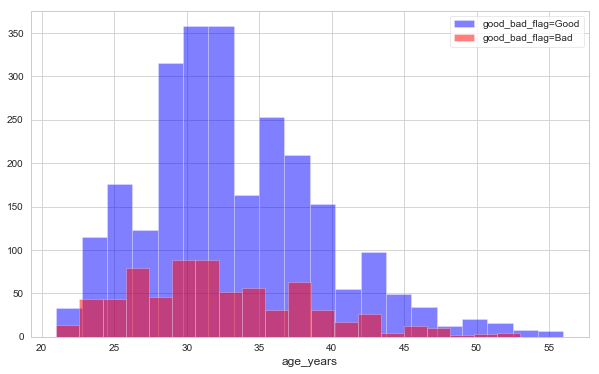

In [238]:
# using dataframe with the missing data
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
merged_df[merged_df['good_bad_flag']=='Good']['age_years'].hist(alpha=0.5,color='blue',
                                              bins=20,label='good_bad_flag=Good')
merged_df[merged_df['good_bad_flag']=='Bad']['age_years'].hist(alpha=0.5,color='red',
                                              bins=20,label='good_bad_flag=Bad')
plt.legend()
plt.xlabel('age_years')

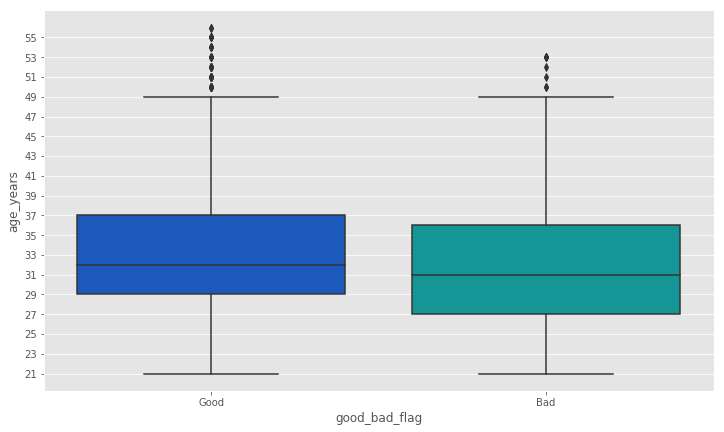

In [161]:
# Quartile distribution of age, before imputing
plt.style.use('ggplot')
plt.figure(figsize=(12, 7))
sns.boxplot(x='good_bad_flag',y='age_years', data=merged_df,palette='winter')
ages = merged_df['age_years']
plt.yticks(np.arange(min(ages), max(ages)+1, 2.0))
plt.show()

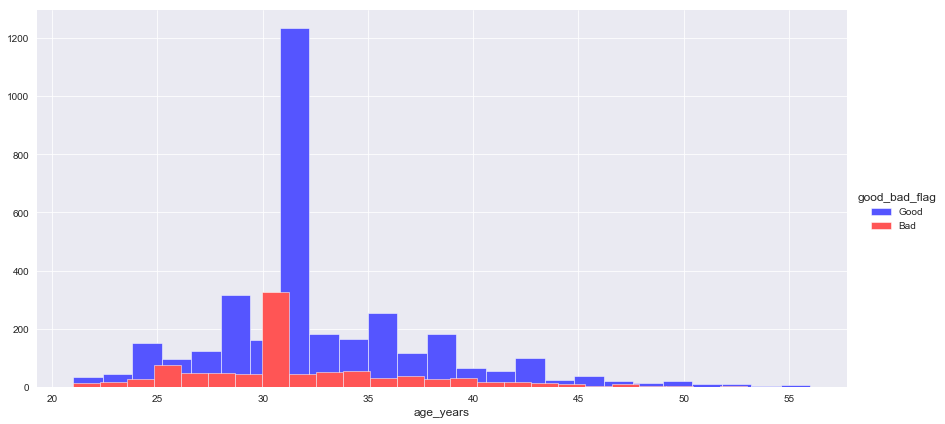

In [254]:
# distribution after imputing
sns.set_style('darkgrid')
g = sns.FacetGrid(merged_df_,hue="good_bad_flag",palette='seismic',height=6,aspect=2)
g = g.map(plt.hist,'age_years',bins=25)
g.add_legend()

In [263]:
merged_df[pd.isna(merged_df['age_years'])]['age_years'].size

1099

1. A greater number of younger clients (<35) had bad loans compared to older clients. Similarly, a greater number of younger clients (<35) had good loans compared to older clients.
2. 1099 unknown values for age
Let's transform the age column into categorical, using agebins. Set the unknown values to 'unknown' in the category. Edit: Agebins reduce the accuracy of the predictions (worse than Ageyears. -1.8)

In [291]:
merged_df['AgeBin'] = '' 
merged_df.loc[((merged_df['age_years'] > 20) & (merged_df['age_years'] < 25)), 'AgeBin'] = 'early20s'
merged_df.loc[((merged_df['age_years'] >= 25) & (merged_df['age_years'] < 30)), 'AgeBin'] = 'late20s'
merged_df.loc[((merged_df['age_years'] >= 30) & (merged_df['age_years'] < 35)), 'AgeBin'] = 'early30s' 
merged_df.loc[((merged_df['age_years'] >= 35) & (merged_df['age_years'] < 40)), 'AgeBin'] = 'late30s'
merged_df.loc[((merged_df['age_years'] >= 40) & (merged_df['age_years'] < 45)), 'AgeBin'] = 'early40s'
merged_df.loc[((merged_df['age_years'] >= 45) & (merged_df['age_years'] < 50)), 'AgeBin'] = 'late40s'
merged_df.loc[((merged_df['age_years'] >= 50) & (merged_df['age_years'] < 55)), 'AgeBin'] = 'early50s'
merged_df.loc[((merged_df['age_years'] >= 55) & (merged_df['age_years'] < 60)), 'AgeBin'] = 'late50s'
merged_df.loc[(np.isnan(merged_df['age_years'])), 'AgeBin']  = 'Unknown'

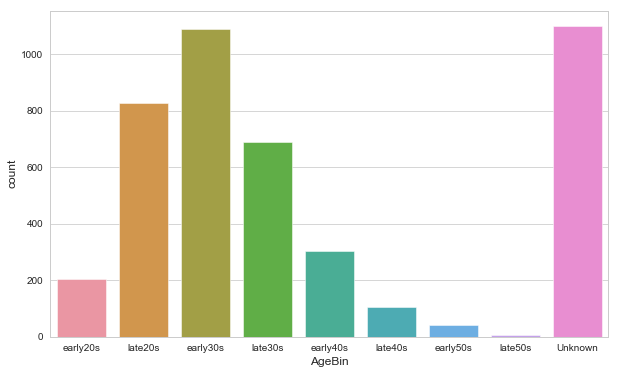

In [299]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(
    data=merged_df, x='AgeBin', order=['early20s', 'late20s', 'early30s', 'late30s', 'early40s', 'late40s', 'early50s', 'late50s', 'Unknown'])

In [300]:
age = merged_df.groupby(['AgeBin', 'good_bad_flag']).size().unstack(1)
age['bad_propo'] = (age['Bad']/(age['Bad'] + age['Good']))
age.sort_values(by='bad_propo', ascending=False)

good_bad_flag,Bad,Good,bad_propo
AgeBin,,,
early20s,58.0,148.0,0.281553
late20s,213.0,614.0,0.257557
late40s,24.0,81.0,0.228571
Unknown,239.0,860.0,0.217470
early40s,62.0,242.0,0.203947
late30s,139.0,551.0,0.201449
early30s,210.0,879.0,0.192837
early50s,7.0,34.0,0.170732
late50s,NaN,7.0,NaN


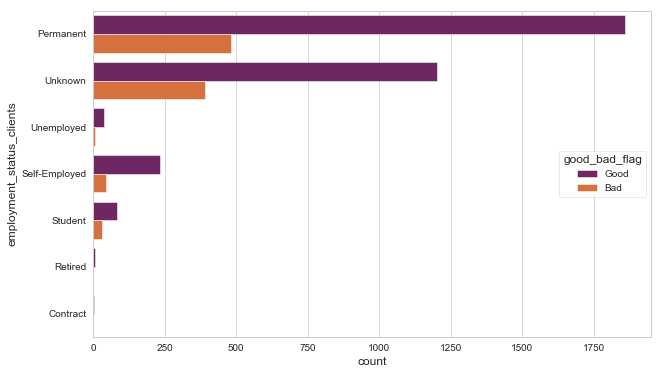

In [297]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(y='employment_status_clients', data=merged_df, hue='good_bad_flag', palette='inferno')

In [241]:
employment = merged_df.groupby(['employment_status_clients', 'good_bad_flag']).size().unstack(1)
employment['bad_propo'] = (employment['Bad']/(employment['Bad'] + employment['Good']))
employment.sort_values(by='bad_propo', ascending=False)

good_bad_flag,Bad,Good,bad_propo
employment_status_clients,,,
Student,30.0,81.0,0.270270
Unknown,389.0,1203.0,0.244347
Permanent,481.0,1859.0,0.205556
Unemployed,7.0,36.0,0.162791
Self-Employed,45.0,232.0,0.162455
Contract,NaN,1.0,NaN
Retired,NaN,4.0,NaN


Students and those with undocumented employment status have the highest likelihood to have a bad loan. Interestingly, the self-employed have lower probability to have a bad loan compared to the permanently employed. Compared to the permanent and unknown classes, there's little data on the other classes, so the numerical effect on the proportions is less significant

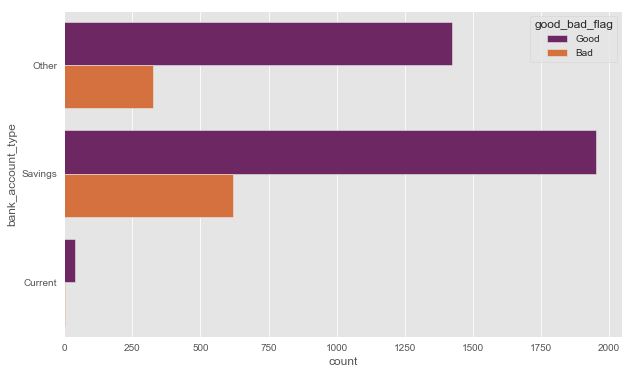

In [209]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.countplot(y='bank_account_type', data=merged_df, hue='good_bad_flag', palette='inferno')

In [242]:
account = merged_df.groupby(['bank_account_type', 'good_bad_flag']).size().unstack(1)
account['bad_propo'] = (account['Bad']/(account['Bad'] + account['Good']))
account

good_bad_flag,Bad,Good,bad_propo
bank_account_type,,,
Current,5,41,0.108696
Other,327,1425,0.186644
Savings,620,1950,0.241245


The clients with a Savings account in their banks seem to have a higher likelihood to default. The 'Other' category is more numerically relevant than the 'Current' category.

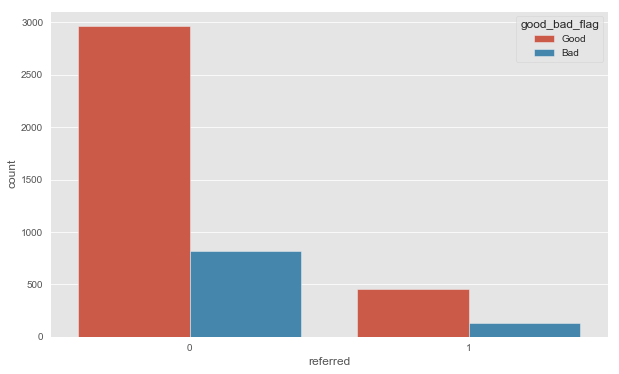

In [214]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.countplot(x='referred', data=merged_df, hue='good_bad_flag')

In [197]:
ref = merged_df.groupby(['referred', 'good_bad_flag']).size().unstack(1)
ref['bad_propo'] = (ref['Bad']/(ref['Bad'] + ref['Good']))
ref

good_bad_flag,Bad,Good,bad_propo
referred,,,
0,818,2963,0.216345
1,134,453,0.228279


There is a greater probability for the clients who were referred to have a bad loan compared to those who were referred. But the value is not significantly greater than that for the unreferred

In [196]:
name = merged_df.groupby(['bank_name_clients', 'good_bad_flag']).size().unstack(1)
name['bad_propo'] = (name['Bad']/(name['Bad'] + name['Good']))
print(name.sort_values(by='bad_propo', ascending=False).head(3))
print(name.sort_values(by='bad_propo', ascending=False).tail(3))

good_bad_flag      Bad  Good  bad_propo
bank_name_clients                      
Sterling Bank       15    27   0.357143
Skye Bank           21    54   0.280000
EcoBank             30    86   0.258621
good_bad_flag       Bad  Good  bad_propo
bank_name_clients                       
Union Bank            2    13   0.133333
Wema Bank             2    17   0.105263
Standard Chartered    1    12   0.076923


Clients with account in Sterling Bank are most likely to have bad loans while those from Standard Chartered are least likely. Can we use this?

Let's explore the age column some more. Can we combine it with other features to get more descriptive features?

In [255]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 19 columns):
customerid                   4368 non-null object
loannumber                   4368 non-null int64
loanamount                   4368 non-null float64
termdays                     4368 non-null int64
good_bad_flag                4368 non-null object
bank_account_type            4368 non-null object
longitude_gps                3269 non-null float64
latitude_gps                 3269 non-null float64
bank_name_clients            4368 non-null object
employment_status_clients    4368 non-null object
prev_termdaysmean            4359 non-null float64
prev_daysearlymean           4359 non-null float64
prev_dayslatemean            4359 non-null float64
prev_loanamountmean          4359 non-null float64
prev_wait_timemean           4359 non-null float64
prev_referredcount           4359 non-null float64
age_years                    3269 non-null float64
referred                     4368 n

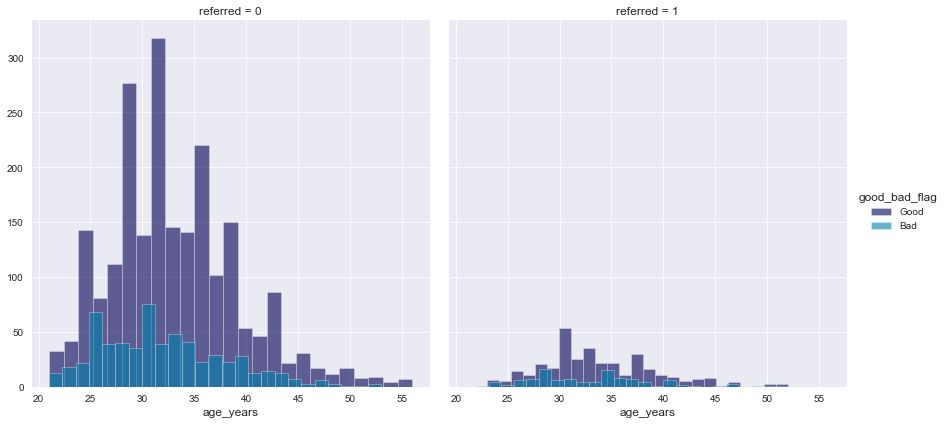

In [259]:
g = sns.FacetGrid(merged_df, col='referred', hue='good_bad_flag', palette='ocean',height=6,aspect=1)
g.map(plt.hist, 'age_years', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()